In [38]:
from tkinter import filedialog
from math import log
from numpy.random import rand

import tkinter as tk
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [23]:
def plotTwoLabelData(dataFrame_Name, dfLength):
    
    plt.xlabel('x data')
    plt.ylabel('y data')
    for i in range(0, dfLength):
        if dataFrame_Name['2'][i] == 1.0:
            plt.scatter(dataFrame_Name['0'][i], dataFrame_Name['1'][i], c = 'r', marker = '.')
        elif dataFrame_Name['2'][i] == 2.0:
            plt.scatter(dataFrame_Name['0'][i], dataFrame_Name['1'][i], c = 'b', marker = '.')
            
    labelOne = mpatches.Patch(color='red', label='1')
    labelTwo = mpatches.Patch(color='blue', label='2')
    plt.legend(handles = [labelOne, labelTwo])

In [24]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [25]:
def findPredictClass(predictProbability):
    if predictProbability [0] >= predictProbability [1]:
        train_predictClass = 0
    else:
        train_predictClass = 1
    return train_predictClass

In [36]:
def DataBackpropagation():
    
    lr                 = float(lr_.get())
    lrRate             = int(lrRate_.get())
    hiddenNeuronsNum   = int(hiddenNeuronsNum_.get())
    stop_loss          = int(CrossEntropy_.get())
    stop_iteration     = int(Iteration_.get())
    stop_trainIdenRate = float(IdenRate_Train_.get())
    stop_testIdenRate  = float(IdenRate_Test_.get())
    
    # read CSV
    data_df = pd.DataFrame(pd.read_csv(CSV_path))
    
    # shuffle and split the data
    data_df = data_df.sample(frac=1).reset_index(drop=True)
    dataLength = len(data_df)
    trainData_df = data_df.loc['0':str(2*dataLength/3-1),'0':'2']             # train data
    testData_df  = data_df.loc[str(2*dataLength/3-1):dataLength,'0':'2']      # test data
    testData_df.reset_index(inplace=True)                                     # reset index 0~dataLength
    print("data length :",len(data_df))
    print("train data length :",len(trainData_df))
    print("test data length :",len(testData_df))
    
    # plot the Data chart
    plt.title('All Data')
    plotTwoLabelData(data_df, len(data_df))
    plt.show()
    plt.title('Training data')
    plotTwoLabelData(trainData_df, len(trainData_df))
    plt.show()
    plt.title('Test data')
    plotTwoLabelData(testData_df, len(testData_df))
    plt.show()
    
    # make dataframe to dict
    train_dict = trainData_df.to_dict(orient='dict')
    test_dict  = testData_df.to_dict(orient='dict')
    
    # 參數設定
    loss_train  = 0
    loss_flag = True
    loss_train_history = []
    loss_test_history = []
    iteration = 0
    NUM = hiddenNeuronsNum
            
    layer1 = rand(3,hiddenNeuronsNum)
    layer2 = rand(hiddenNeuronsNum+1,2)
    #print("Hidden Layer Number is ",hiddenNeuronsNum)
    #print("\nOriginal weight/bias of layer1 \n",layer1)
    #print("\nOriginal weight/bias of layer2 \n",layer2)
    
    # Training and compute
    while (loss_flag):
    
        train_predict = 0
        loss_train = 0
        loss_train_ = 0
        loss_test = 0
        loss_test_ = 0
        layer1_changeValue = np.zeros((3,hiddenNeuronsNum))
        layer2_changeValue = np.zeros((hiddenNeuronsNum+1,2))
        iteration = iteration + 1
        
        for i in range (len(trainData_df)):
            train_inputArr = np.array([train_dict['0'][i], train_dict['1'][i], 1])
            train_tempLabel = int(train_dict['2'][i]) - 1
            label = []
            if(train_tempLabel == 0):
                label = [1, 0]
            else:
                label = [0, 1]
                
            layer1_beforeSig = np.dot(train_inputArr,layer1)
            layerOutput = sigmoid(layer1_beforeSig)
            layerOutput = np.append(layerOutput, 1.0)
            
            layer2_beforeSig = np.dot(layerOutput,layer2)
            train_predict = sigmoid(layer2_beforeSig)
            
            # compute the train loss
            loss_train += -( label[0]*log(train_predict[0]) + (1-label[0])*log(1-train_predict[0]))
            loss_train += -( label[1]*log(train_predict[1]) + (1-label[1])*log(1-train_predict[1]))
            loss_train_ += abs(train_predict[0]-label[0])
            loss_train_ += abs(train_predict[1]-label[1])
            
            # renew layer2 weight
            forwardPass = np.reshape(layerOutput[:NUM],(NUM,1))
            # RENEW WIGHT
            layer2_changeValue[:NUM,:1]   += forwardPass* train_predict[0]*(1-train_predict[0])* (train_predict[0]-label[0])
            layer2_changeValue[:NUM,1:2]  += forwardPass* train_predict[1]*(1-train_predict[1])* (train_predict[1]-label[1])
            '''
            for j in range(NUM):
                layer2_changeValue[j,:] *= layerOutput[NUM]
            '''
            # RENEW BIAS
            layer2_changeValue[NUM:NUM+1,:1]  += train_predict[0]*(1-train_predict[0])*(train_predict[0]-label[0])
            layer2_changeValue[NUM:NUM+1,1:2] += train_predict[1]*(1-train_predict[1])*(train_predict[1]-label[1])
            
            # renew layer1 weight
            tmp = train_predict[0]*(1-train_predict[0])*(train_predict[0]-label[0])
            tmp += train_predict[1]*(1-train_predict[1])*(train_predict[1]-label[1])
            for i in range(NUM):
                layer1_changeValue[0,i] += train_dict['0'][i]* layerOutput[i]*(1-layerOutput[i])* tmp * layer2[i,0]
                layer1_changeValue[1,i] += train_dict['1'][i]* layerOutput[i]*(1-layerOutput[i])* tmp * layer2[i,1]
                layer1_changeValue[2,i] += 1                 * layerOutput[i]*(1-layerOutput[i])* tmp
                
        for i in range (len(testData_df)):
            test_inputArr = np.array([test_dict['0'][i], test_dict['1'][i], 1])
            test_tempLabel = int(test_dict['2'][i]) - 1
            label = []
            if(test_tempLabel == 0):
                label = [1, 0]
            else:
                label = [0, 1]
                
            layer1_beforeSig = np.dot(test_inputArr,layer1)
            layerOutput = sigmoid(layer1_beforeSig)
            layerOutput = np.append(layerOutput, 1.0)
            
            layer2_beforeSig = np.dot(layerOutput,layer2)
            test_predict = sigmoid(layer2_beforeSig)
            
            # compute the train loss
            loss_test += -( label[0]*log(test_predict[0]) + (1-label[0])*log(1-test_predict[0]))
            loss_test += -( label[1]*log(test_predict[1]) + (1-label[1])*log(1-test_predict[1]))
            loss_test_ += abs(test_predict[0]-label[0])
            loss_test_ += abs(test_predict[1]-label[1])
            
        loss_train_history.append(loss_train)
        loss_test_history.append(loss_test)
        layer1 -= lr*layer1_changeValue
        layer2 -= lr*layer2_changeValue
        
        # 每50次更改學習率
        if iteration % 50 == 0 and iteration !=0:
            lr *= lrRate
        
        # 計算訓練集的辨識率
        correctNum_train = 0
        for i in range (len(trainData_df)):
            train_inputArr = np.array([train_dict['0'][i], train_dict['1'][i], 1])
            train_tempLabel = int(train_dict['2'][i]) - 1
            layerOutput = sigmoid(np.dot(train_inputArr,layer1))
            layerOutput = np.append(layerOutput, 1.0)
            train_predict = sigmoid(np.dot(layerOutput,layer2))
            if findPredictClass(train_predict) == train_tempLabel:
                correctNum_train += 1
        trainIdenRate = correctNum_train/len(trainData_df)
        
        # 計算測試集的辨識率
        correctNum_test = 0
        for i in range (len(testData_df)):
            test_inputArr = np.array([test_dict['0'][i], test_dict['1'][i], 1])
            test_tempLabel = int(test_dict['2'][i]) - 1
            layerOutput = sigmoid(np.dot(test_inputArr,layer1))
            layerOutput = np.append(layerOutput, 1.0)
            test_predict = sigmoid(np.dot(layerOutput,layer2))
            if findPredictClass(test_predict) == test_tempLabel:
                correctNum_test += 1
        testIdenRate = correctNum_test/len(testData_df)
        
        # stop condition
        if(loss_train < stop_loss or iteration >= stop_iteration or trainIdenRate >= stop_trainIdenRate or testIdenRate >= stop_testIdenRate):
            loss_flag = False
            
    # print and plot
    plt.title('Train cross entropy')
    plt.xlabel('Iteration')
    plt.ylabel('cross Entropy')
    plt.plot(range(1,len(loss_train_history)+1), loss_train_history, lw = 2, c='darkorange')
    plt.show()
    
    plt.title('Test cross entropy')
    plt.xlabel('Iteration')
    plt.ylabel('cross Entropy')
    plt.plot(range(1,len(loss_test_history)+1), loss_test_history, lw = 2, c='darkgreen')
    plt.show()
     
    print("\nWeight/Bias of layer1 after training\n",layer1)
    print("\nWeight/Bias of layer2 after training\n",layer2)
    
    # TK TEXT
    show_text.insert('insert',"data length : ")
    show_text.insert('insert', len(data_df)) 
    show_text.insert('insert',"\ntrain data length : ")
    show_text.insert('insert', len(trainData_df))
    show_text.insert('insert',"\ntest data length  : ")
    show_text.insert('insert', len(testData_df))
    
    show_text.insert('insert',"\n\nIteration : ")
    show_text.insert('insert', iteration) 
    
    show_text.insert('insert',"\n\nTrain Cross Entropy : ")
    show_text.insert('insert', round(loss_train, 5))
    show_text.insert('insert',"\nTrain Cross Entropy : ")
    show_text.insert('insert', round(loss_test, 5))
    
    show_text.insert('insert',"\n\nTrain Identification rate    : ")
    show_text.insert('insert', round(correctNum_train/len(trainData_df), 5)) 
    show_text.insert('insert',"\nTest Identification rate     : ")
    show_text.insert('insert', round(correctNum_test/len(testData_df), 5))
    show_text.insert('insert',"\nAll data Identification rate : ")
    show_text.insert('insert', round((correctNum_train + correctNum_test)/len(data_df), 5))
            
    #畫出分布樣貌
    xPoint = np.linspace(int(min(trainData_df['0']))-2, int(max(trainData_df['0']))+2, 30)
    yPoint = np.linspace(int(min(trainData_df['1']))-2, int(max(trainData_df['1']))+2, 30)
    for i in range(30):
        for j in range(30): 
            train_inputArr = np.array([xPoint[i], yPoint[j], 1])
            layerOutput = sigmoid(np.dot(train_inputArr,layer1))
            layerOutput = np.append(layerOutput, 1.0)
            train_predict = sigmoid(np.dot(layerOutput,layer2))
            if findPredictClass(train_predict) == 1.0:
                plt.scatter(xPoint[i], yPoint[j], c = 'lightblue', marker = 'x')
            else:
                plt.scatter(xPoint[i], yPoint[j], c = 'lightpink', marker = 'x')
            
    plt.title('Backpropagation')
    plt.xlabel('x data')
    plt.ylabel('y data')
    plotTwoLabelData(data_df, len(data_df))
    plt.show()

data length : 400
train data length : 266
test data length : 134


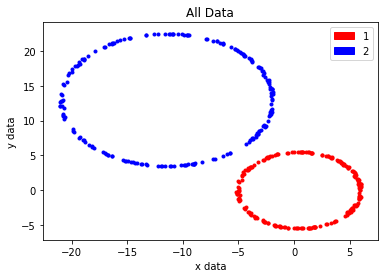

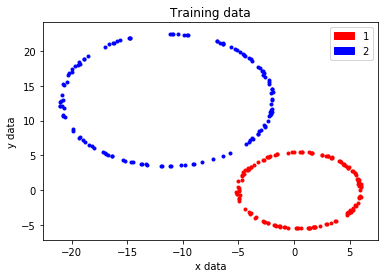

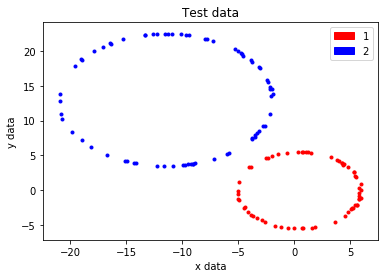

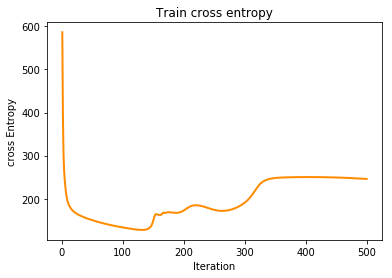

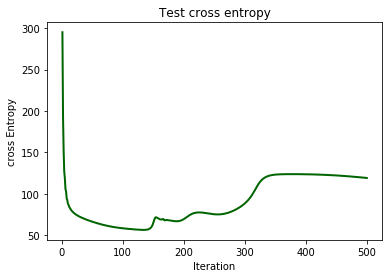


Weight/Bias of layer1 after training
 [[ 1.48961495 -0.36309572  0.4493692  -0.26851187  0.94906589]
 [ 0.83889094 -0.31170434  0.99439368 -2.76249477  0.5323498 ]
 [-0.01061891  0.36005286 -0.07555481  0.34299055  0.73597272]]

Weight/Bias of layer2 after training
 [[-0.66471723  1.01091562]
 [-3.47504994  3.50637137]
 [-1.42405077  1.44967485]
 [ 6.75357634 -6.86863757]
 [-0.13276107 -0.20324375]
 [ 2.41582009 -2.45394972]]


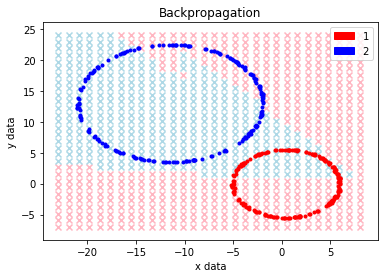

data length : 400
train data length : 266
test data length : 134


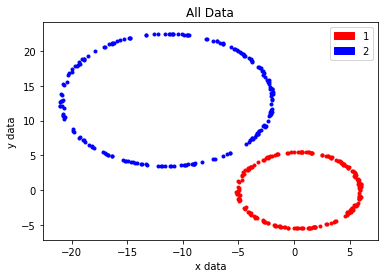

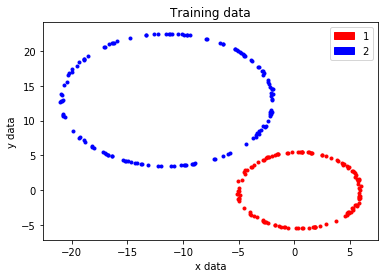

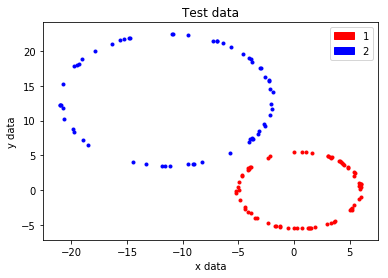

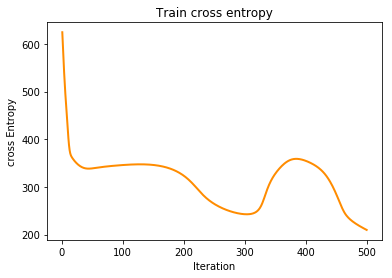

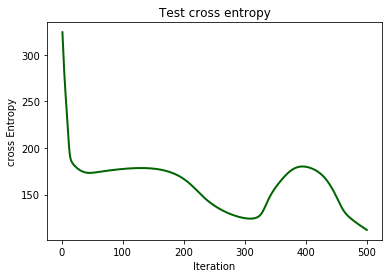


Weight/Bias of layer1 after training
 [[ 0.29710654 -0.07957994  0.50608918  0.49573573  0.58969087]
 [ 0.12933372  0.26190366  0.35754779  0.21042845  0.39751784]
 [ 0.94249603  0.52963194  0.15953773  0.89129     0.8948174 ]]

Weight/Bias of layer2 after training
 [[ 1.30133356 -1.35286868]
 [-4.16176812  3.9724553 ]
 [ 0.39467214 -0.11341365]
 [ 1.94237577 -2.41666394]
 [-0.4319315   0.74664872]
 [ 1.05235446 -0.98371188]]


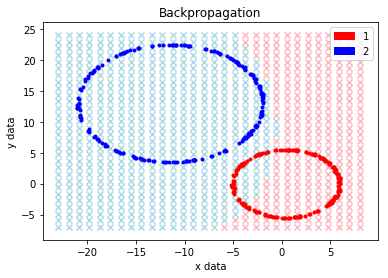

data length : 400
train data length : 266
test data length : 134


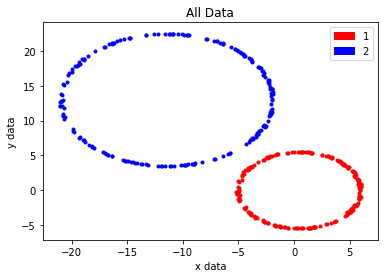

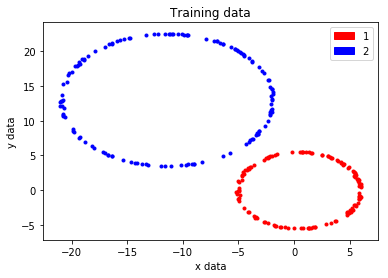

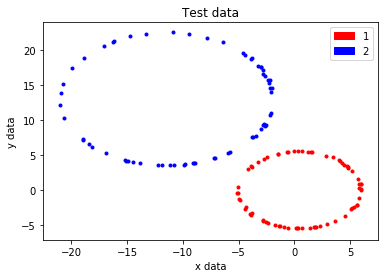

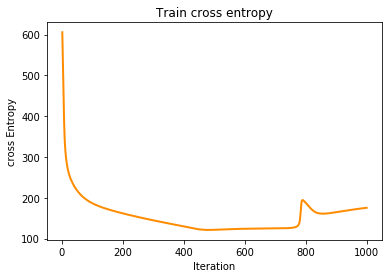

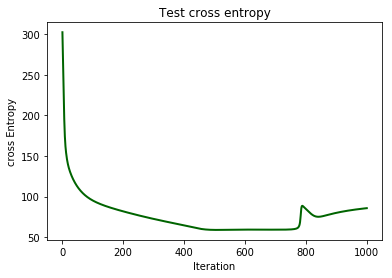


Weight/Bias of layer1 after training
 [[-0.50082828  0.929632    0.72416186  0.7072971  -1.11763852]
 [ 0.38415388 -0.93774732  0.4259025   0.24744902 -0.75594791]
 [ 0.36770394  0.8021733   0.46440016  0.36306816  0.4144083 ]]

Weight/Bias of layer2 after training
 [[-3.67291397  4.24874063]
 [ 5.14434554 -4.87051056]
 [-2.64466667  2.52294929]
 [ 2.35220539 -2.44805159]
 [-0.63953369  0.42424457]
 [ 3.2936103  -3.65922926]]


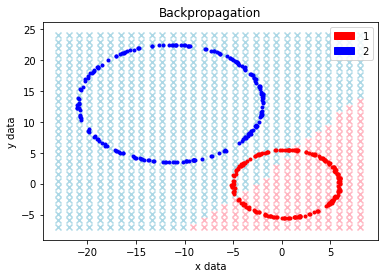

In [37]:
window = tk.Tk()
window.title('Backpropagation Classifier')
window.geometry('600x370')

#------------------------------------------------------------------------#

def Pathfinding():
    global CSV_path 
    CSV_path = filedialog.askopenfilename()
    show_text.insert('insert', "File Path：" + CSV_path)
    show_text.insert('insert', "\n\n")
    return CSV_path

button_selectCSV = tk.Button(window, text = "選擇檔案", command = Pathfinding)
button_selectCSV.pack()
#------------------------------------------------------------------------#

# 以下為 lr Label
lr_frame = tk.Frame(window)
lr_frame.pack(side=tk.TOP)
lr_label = tk.Label(lr_frame, text = '學習率')
lr_label.pack(side = tk.LEFT)
# lr Entry
lr_ = tk.Entry(lr_frame)
lr_.pack()

# 以下為 lrRate Label
lrRate_frame = tk.Frame(window)
lrRate_frame.pack(side=tk.TOP)
lrRate_label = tk.Label(lrRate_frame, text = '學習更改率')
lrRate_label.pack(side = tk.LEFT)
# lr Entry
lrRate_ = tk.Entry(lrRate_frame)
lrRate_.pack()

# 以下為 hiddenNeuronsNum Label
hiddenNeuronsNum_frame = tk.Frame(window)
hiddenNeuronsNum_frame.pack(side=tk.TOP)
hiddenNeuronsNum_label = tk.Label(hiddenNeuronsNum_frame, text = '隱藏層神經元個數')
hiddenNeuronsNum_label.pack(side = tk.LEFT)
# lr Entry
hiddenNeuronsNum_ = tk.Entry(hiddenNeuronsNum_frame)
hiddenNeuronsNum_.pack()


# 以下為 Iteration Label
Iteration_frame = tk.Frame(window)
Iteration_frame.pack(side=tk.TOP)
Iteration_label = tk.Label(Iteration_frame, text = '終止條件：遞迴次數')
Iteration_label.pack(side = tk.LEFT)
# Iteration Entry
Iteration_ = tk.Entry(Iteration_frame)
Iteration_.pack()


# 以下為 CrossEntropy Label
CrossEntropy_frame = tk.Frame(window)
CrossEntropy_frame.pack(side=tk.TOP)
CrossEntropy_label = tk.Label(CrossEntropy_frame, text = '終止條件：交叉熵大小')
CrossEntropy_label.pack(side = tk.LEFT)
# CrossEntropy Entry
CrossEntropy_ = tk.Entry(CrossEntropy_frame)
CrossEntropy_.pack()


# 以下為 IdenRate Train Label
IdenRate_Train_frame = tk.Frame(window)
IdenRate_Train_frame.pack(side=tk.TOP)
IdenRate_Train_label = tk.Label(IdenRate_Train_frame, text = '終止條件：訓練集辨識率大小')
IdenRate_Train_label.pack(side = tk.LEFT)
# IdenRate Train Entry
IdenRate_Train_ = tk.Entry(IdenRate_Train_frame)
IdenRate_Train_.pack()


# 以下為 IdenRate Test Label
IdenRate_Test_frame = tk.Frame(window)
IdenRate_Test_frame.pack(side=tk.TOP)
IdenRate_Test_label = tk.Label(IdenRate_Test_frame, text = '終止條件：訓練集辨識率大小')
IdenRate_Test_label.pack(side = tk.LEFT)
# IdenRate Test Entry
IdenRate_Test_ = tk.Entry(IdenRate_Test_frame)
IdenRate_Test_.pack()


#------------------------------------------------------------------------#
# 以下為 Show Text
show_text = tk.Text(window, height = 10, width = 52)
show_text.pack()
#------------------------------------------------------------------------#
# Part of Function and Button
def deleteData():   
    show_text.delete("1.0",tk.END)

button_train = tk.Button(window, text = "Train", command = DataBackpropagation)
button_train.pack()

button_clear = tk.Button(window, text = "Clear", command = deleteData)
button_clear.pack()

window.mainloop()